<a href="https://colab.research.google.com/github/sharonGRD/modelo_emociones/blob/main/Sharon_Hannah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO FINAL
CONJUNTO DE DATOS: El conjunto de datos Cohn-Kanade (CK+)

QUE TRATA DE:  es una excelente herramienta para estudios de reconocimiento de emociones, análisis de expresiones faciales y desarrollo de modelos relacionados con la detección de afecto.

CONTIENE: Contiene 920 secuencias de expresiones faciales individuales que culminan en una expresión emocional ya asignada.

LA IDEA ES DETECTAR EMOCIONES EN TIMPO REAL ( LAS CLASIFCADAS DENTRO DE NUETROS DATOS)

1, CARGAR DATOS

In [154]:
pip install numpy pandas opencv-python matplotlib seaborn tensorflow scikit-learn dlib imutils albumentations tqdm


In [155]:
pip install flask tensorflow pillow


In [156]:
!pip install streamlit

In [157]:
#librerias y archivo
import numpy as np #ayuda en datos numericos
import os #ayuda con directorios
import cv2 #ayuda con imagenes
import pandas as pd #conjunto de datos
import matplotlib.pyplot as plt #crea graficos
import tensorflow as tf #libreria de inteligencia artificial
import seaborn as sns #graficos estadisticos
import math
from IPython import get_ipython
from IPython.display import display
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator #ayuda con modelo de aprendizaje autonomo
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
# ruta = '/content/drive/MyDrive/archive (3)/ckextended.csv'
ruta ='/content/drive/MyDrive/CURSO IA /ckextended.csv'
df = pd.read_csv(ruta, sep = ',')
df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [159]:
df.shape #optien el numero de filas y columnas de datframe

(920, 3)

In [160]:
df['pixels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: pixels
Non-Null Count  Dtype 
--------------  ----- 
920 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [161]:
df.groupby('emotion').size()

,0
emotion,
0,45
1,59
2,25
3,69
4,28
5,83
6,593
7,18


In [162]:
df.head() #sirve para mostrar las primeras filas de dataframe

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [163]:
df.info #se utiliza para obtener infomacion del datframe

<bound method DataFrame.info of      emotion                                             pixels        Usage
0          6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...     Training
1          6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...     Training
2          6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...     Training
3          6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...     Training
4          6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...     Training
..       ...                                                ...          ...
915        5  87 86 88 92 92 127 231 248 251 253 254 254 254...  PrivateTest
916        5  21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...  PrivateTest
917        5  76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...  PrivateTest
918        5  114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...  PrivateTest
919        5  101 102 99 96 98 42 23 18 15 17 27 34 17 24 29...  PrivateTest

[920 rows x 3 columns]>

In [164]:
df['emotion'].unique()

array([6, 3, 7, 0, 1, 4, 2, 5])

In [165]:
df.isnull().sum() #para datos nulos

,0
emotion,0
pixels,0
Usage,0


2. PREPROCESAMIENO LAS IAMGENES Y ETIQUETAS, CONFIGURACION YA DE LAS IMAGEN EN TAMAÑO Y LISTA DE LOS DATOS A EVALUAR

In [166]:
#especificar la dimencion de la imagen que va a leer
IMG_SIZE = 48

In [167]:
#emociones disponibles en los datos
EMOTIONS = ['neutro', 'ira', 'disgusto', 'miedo', 'felicidad', 'tristeza', 'sorpresa','desprecio']

PREPROCESAMIENTO

In [168]:
ruta_imagenes = df['pixels'].values
labels = df['emotion'].values

In [169]:
def pixeles_a_imagen(pixeles):
    # Convierte a un objeto de tipo arreglo
    pixeles_arreglo = np.array(pixeles.split(), dtype = 'uint8')
    image = pixeles_arreglo.reshape(48, 48, 1)
    return image

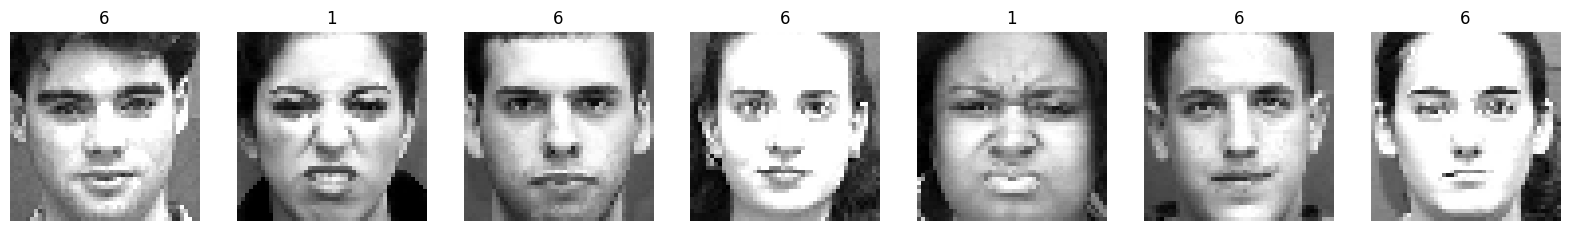

In [170]:
sample_indices = np.random.choice(df.index, 7, replace=False)
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
for i, index in enumerate(sample_indices):
    image = pixeles_a_imagen(df.loc[index, 'pixels'])
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(df.loc[index, 'emotion']) #axes es = a ejes
    axes[i].axis('off')
plt.show()

In [171]:
# Preprocesamiento
def load_data():
    data, labels = [], []
    for index, row in df.iterrows():
        pixels = row['pixels']
        emotion_index = row['emotion']
        # Convert pixel data to image
        img = pixeles_a_imagen(pixels)
        # tamaño de iamgen
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        data.append(img)
        labels.append(emotion_index)
    return np.array(data), np.array(labels)

# Cargar datos
data, labels = load_data()
data = data / 255.0  # Normalización
data = np.expand_dims(data, axis=-1)  # Añadir canal de profundidad
labels = to_categorical(labels, num_classes=len(EMOTIONS))

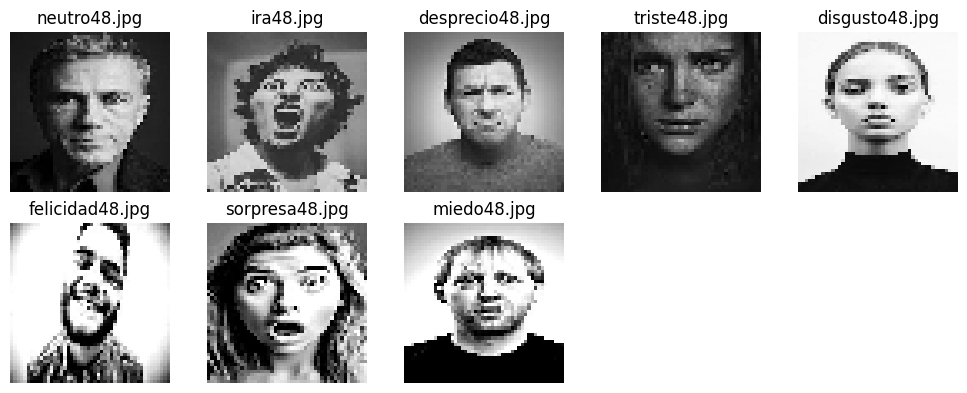

In [172]:
# Ruta a la carpeta de imágenes
IMAGE_FOLDER_PATH = "/content/drive/MyDrive/CURSO IA /imagenes"
IMG_SIZE = (48, 48)

# Procesar y mostrar imágenes
def process_and_display_images(folder_path):
    images, filenames = [], []
    for file in os.listdir(folder_path):
        if file.lower().endswith(('jpg')):
            path = os.path.join(folder_path, file)
            # Cargar y redimensionar
            img = load_img(path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalización
            images.append(img_array)
            filenames.append(file)

    # Número de imágenes
    num_images = len(images)

    # Calcular el número de filas y columnas necesarias para la cuadrícula
    num_cols = 5  # Número de columnas que deseas
    num_rows = math.ceil(num_images / num_cols)  # Número de filas calculado

    # Mostrar imágenes
    plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Ajuste el tamaño de la figura según el número de imágenes
    for i, img_array in enumerate(images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_array, cmap='gray')  # Escala de grises
        plt.title(filenames[i])
        plt.axis('off')

    plt.tight_layout()  # Ajustar los subgráficos para que no se sobrepongan
    plt.show()

# Ejecutar
process_and_display_images(IMAGE_FOLDER_PATH)


3. DIVIDIR LOS DATOS DE ENTRENAMIENTO Y TESTEO

In [173]:
# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


4. DEFINIR Y COMPILAR EL MODELO COSTRUCCION DE MODELO PASO A PASO

In [175]:
# Definir el modelo secuencial
model = Sequential()

# Primera capa convolucional + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # Imágenes de 48x48 en escala de grises
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanar para pasar a capas densas
model.add(Flatten())

# Capa densa con 128 neuronas
model.add(Dense(128, activation='relu'))

# Capa de salida con una neurona por emoción
model.add(Dense(len(EMOTIONS), activation='softmax'))  # 'len(EMOTIONS)' es el número de clases

# Resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,176 (3.20 MB)

 Trainable params: 839,176 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

5. COMPILAR EL MODELO

In [176]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [177]:
# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=10,  # Número de iteraciones sobre los datos
                    batch_size=32,  # Tamaño del lote
                    validation_data=(X_test, y_test))  # Datos de validación


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.5547 - loss: 1.4938 - val_accuracy: 0.6413 - val_loss: 1.3276
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.6565 - loss: 1.2705 - val_accuracy: 0.6413 - val_loss: 1.2423
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6607 - loss: 1.1383 - val_accuracy: 0.7337 - val_loss: 0.9388
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.7451 - loss: 0.8529 - val_accuracy: 0.7880 - val_loss: 0.7604
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8024 - loss: 0.7337 - val_accuracy: 0.8587 - val_loss: 0.5780
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8425 - loss: 0.5546 - val_accuracy: 0.8533 - val_loss: 0.4986
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8863 - loss: 0.4335 - val_accuracy: 0.8804 - val_loss: 0.4235
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9101 - loss: 0.3096 - val_accuracy: 0.869

In [178]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8783 - loss: 0.4078
Precisión en el conjunto de prueba: 88.04%


7. EVALUAR MODELO

### Predicción de una imagen particular

In [179]:
ruta_imagen_emocion1 = '/content/drive/MyDrive/CURSO IA /imagenes'

(-0.5, 47.5, 47.5, -0.5)

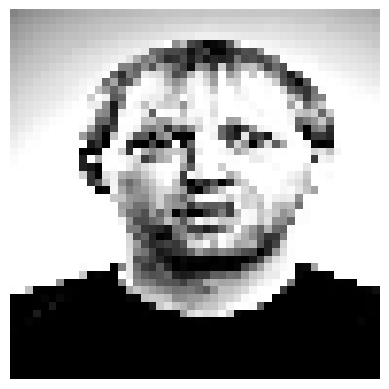

In [180]:
image = load_img(image_path, target_size=(48,48))
# Convertir la imagen a un arreglo NumPy
image_array = img_to_array(image)
image_array = image_array/255

# Agregar una dimensión adicional para representar el lote (batch size de 1)
image_array = np.expand_dims(image_array, axis= 0)

# Convertir a tensor
img_tensor = tf.convert_to_tensor(image_array)
# Convertir a escala de grises
img_tensor = tf.image.rgb_to_grayscale(img_tensor)
img_tensor.shape
plt.imshow(image_array[0])
plt.axis('off')

### Predicción

In [181]:
#emociones disponibles en los datos
EMOTIONS = ['neutro', 'ira', 'disgusto', 'miedo', 'felicidad', 'tristeza', 'sorpresa','desprecio']

In [182]:
model.predict(img_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[9.8200756e-01, 1.7570321e-02, 1.9555370e-07, 1.2235046e-07,
        6.0714396e-05, 3.0491867e-07, 3.5958487e-04, 1.2508880e-06]],
      dtype=float32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


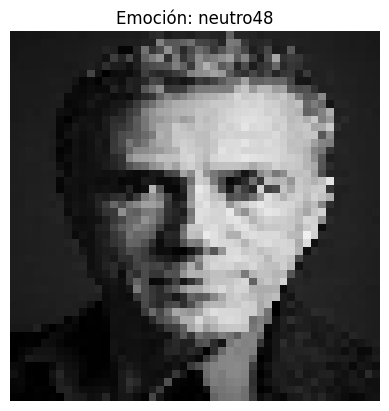

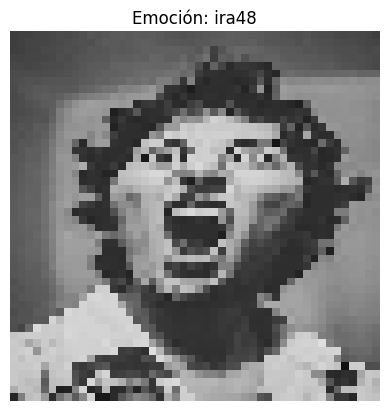

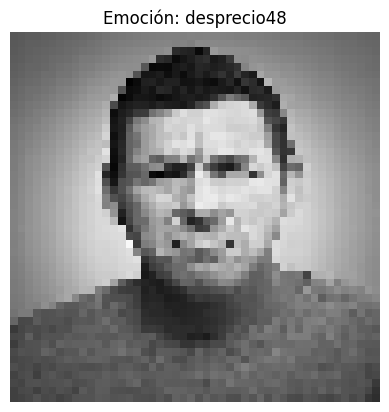

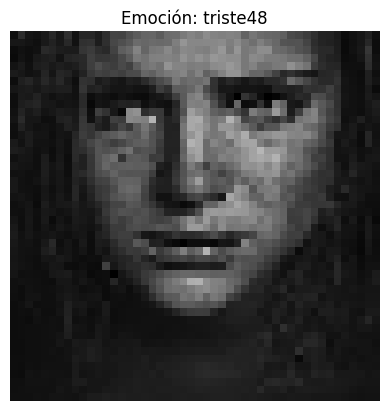

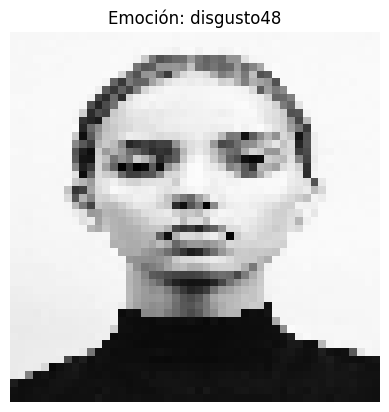

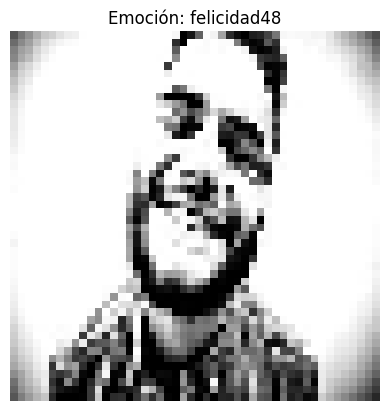

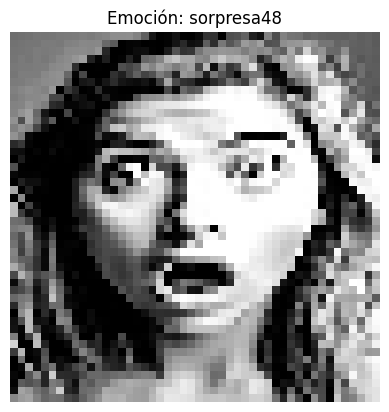

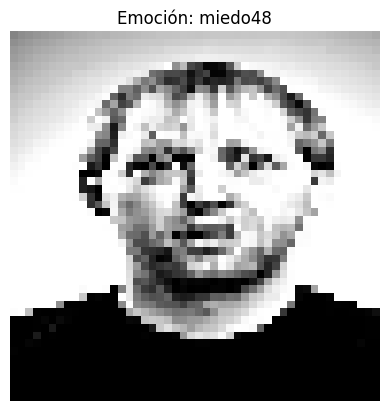

In [183]:
drive.mount('/content/drive')

# Ruta de la carpeta con las imágenes
ruta_carpeta = '/content/drive/MyDrive/CURSO IA /imagenes'

# Obtener la lista de imágenes en la carpeta
imagenes = [os.path.join(ruta_carpeta, img) for img in os.listdir(ruta_carpeta) if img.endswith('.jpg')]

# Procesar y mostrar cada imagen
for image_path in imagenes:
    # Cargar la imagen
    image = load_img(image_path, target_size=(48, 48))
    image_array = img_to_array(image) / 255  # Normalizar los píxeles

    # Convertir a tensor
    img_tensor = tf.convert_to_tensor(image_array)
    img_tensor = tf.image.rgb_to_grayscale(img_tensor)

    # Mostrar la imagen con su nombre de emoción
    plt.imshow(image_array)
    plt.title(f'Emoción: {os.path.basename(image_path).split(".")[0]}')  # El nombre del archivo sin la extensión
    plt.axis('off')
    plt.show()

7. VISUALIZAE LOS RESULTADOS

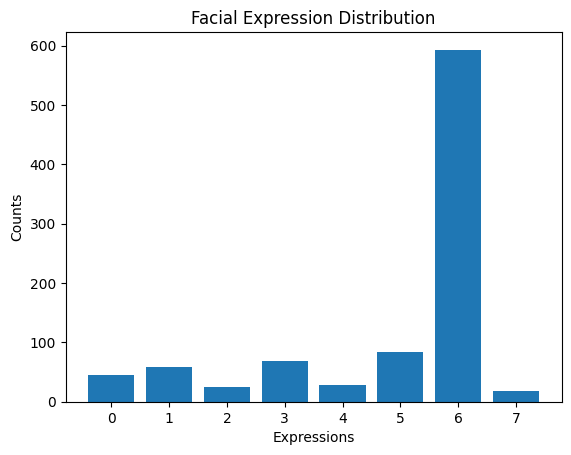

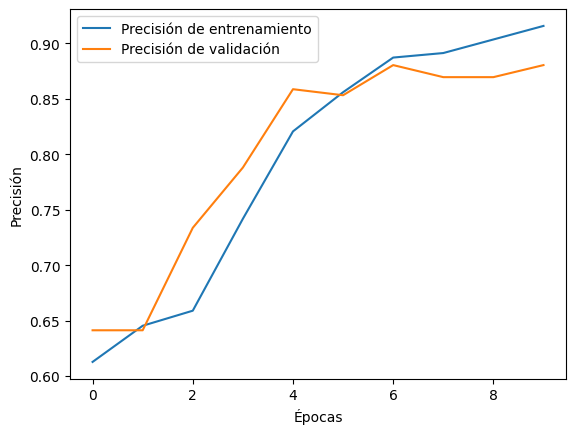

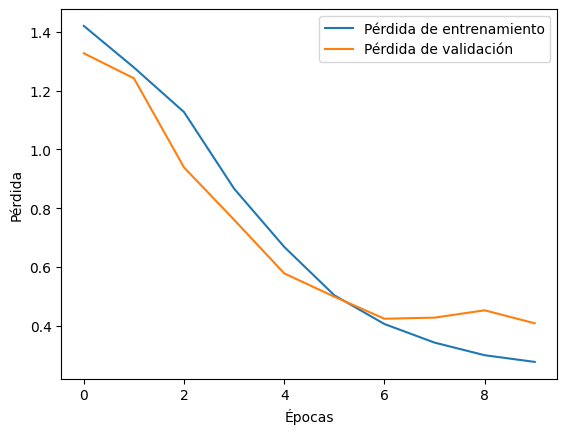

In [184]:
#Grafica de barras
expression_counts = df['emotion'].value_counts()
plt.bar(expression_counts.index, expression_counts.values)
plt.title('Facial Expression Distribution')
plt.xlabel('Expressions')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

8. GUARDAR EL MODELO

In [185]:
model.save("modelo_emociones.h5")


9. REALIZAR PREDICCIONES

In [192]:
def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None  # or handle the error appropriately

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img = np.expand_dims(img, axis=(0, -1))
    prediction = model.predict(img)
    emotion_index = np.argmax(prediction)
    return EMOTIONS[emotion_index]

In [193]:
# Example usage
print(predict_emotion("ruta/imagen_prueba.jpg"))

Error: Could not load image from ruta/imagen_prueba.jpg
None
